In [ ]:
import csv
import math
import argparse
from datetime import datetime
from datetime import timedelta
import numpy as np
import scipy
import scipy.interpolate
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
t = []
x = []
y = []
z = []

In [ ]:
with open('/content/drive/MyDrive/AlfaCrux/B_meas.txt', 'r') as f:
  for line in f:
    x_p, y_p, z_p = list(map(float, line.split()))
    x.append(x_p)
    y.append(y_p)
    z.append(z_p)

In [ ]:
with open('/content/drive/MyDrive/AlfaCrux/t.txt', 'r') as f:
  for line in f:
    t.append(float(line))

In [ ]:
def get_date_obj(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S.%f%z")

In [ ]:
start_utc = '2022-8-7 13:20:2.391Z'            #colocar o tempo em         "%Y-%m-%d %H:%M:%S.%f%z"

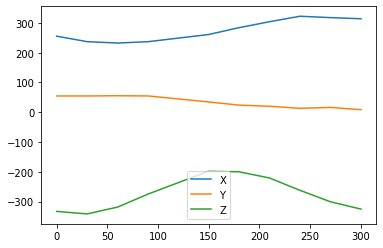

In [ ]:
plt.plot(t, x, label="X")
plt.plot(t, y, label="Y")
plt.plot(t, z, label="Z")
plt.legend()
plt.show()

## SciPY

In [ ]:
x_f = {}
y_f = {}
z_f = {}
for kind in ["linear", "nearest", "nearest-up", "zero", "slinear", "quadratic", "cubic", "previous", "next"]:
  x_f[kind] = scipy.interpolate.interp1d(t, x, kind=kind)
  y_f[kind] = scipy.interpolate.interp1d(t, y, kind=kind)
  z_f[kind] = scipy.interpolate.interp1d(t, z, kind=kind)

In [ ]:
t_axis = np.arange(0, 301, 1)
t_axis

array([0.000000e+00, 1.000000e-04, 2.000000e-04, ..., 2.999997e+02,
       2.999998e+02, 2.999999e+02])

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


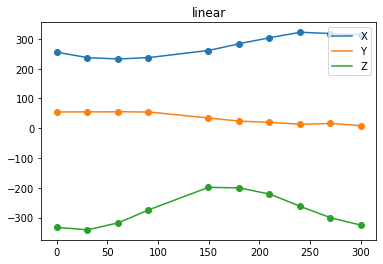

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


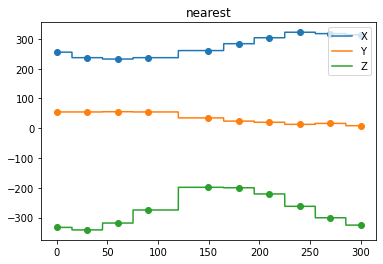

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


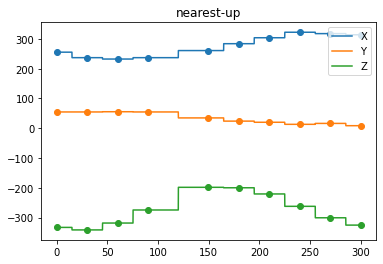

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


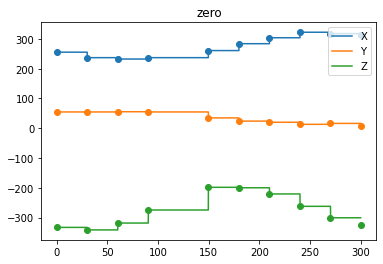

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


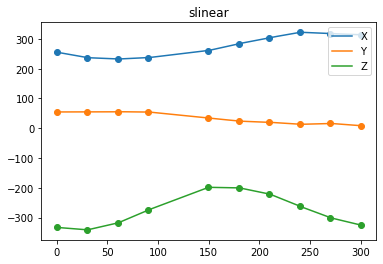

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


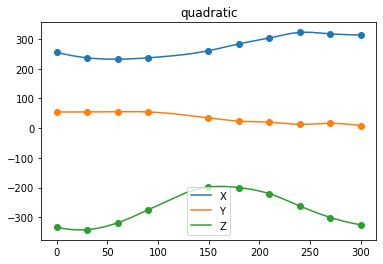

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


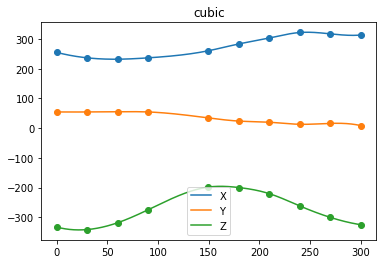

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


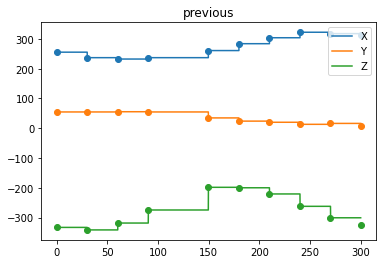

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


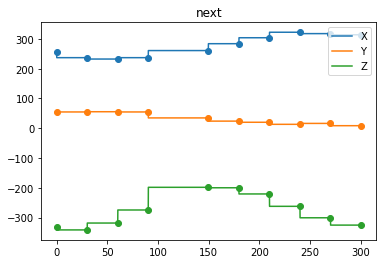

In [ ]:
for kind in x_f:
  plt.plot(t_axis, x_f[kind](t_axis), label="X")
  plt.plot(t_axis, y_f[kind](t_axis), label="Y")
  plt.plot(t_axis, z_f[kind](t_axis), label="Z")
  plt.scatter(t, x)
  plt.scatter(t, y)
  plt.scatter(t, z)
  plt.legend()
  plt.title(kind)
  plt.show()

In [ ]:
def write_csv(x_f, y_f, z_f, start_utc):
  with open('/content/drive/MyDrive/AlfaCrux/output.csv', 'w') as csv_file:

    csv_writer = csv.writer(csv_file, delimiter = ";")
    for t in np.arange(0,301,1):
      date = get_date_obj(start_utc) + timedelta(seconds = int(t))
      csv_line = [
          date.year,
          date.month,
          date.day,
          date.hour,
          date.minute,
          date.second + (date.microsecond/1000000),
          x_f(t),
          y_f(t),
          z_f(t)
      ]
      csv_writer.writerow(csv_line)

      

In [ ]:
write_csv(x_f["cubic"], y_f["cubic"], z_f["cubic"], start_utc)